In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Установим по умолчанию цветовую палитру seaborn

sns.set()
sns.set_palette('Set2')

In [7]:
df  = pd.read_csv('EPL_18_24_data.csv', index_col=0, parse_dates=['Date'])
df.head()

,Date,Time,Location,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AR,AvgH,AvgD,AvgA,Elo_HomeTeam,Elo_AwayTeam,Temperature,Humidity,Wind Speed,Condition
0,2024-04-25,20:00,EGKK,Brighton,Man City,0,4,A,0,3,...,0,6.568,4.890,1.426,1748.398682,2038.480591,44.750000,78.125000,5.687500,Fair
1,2024-04-24,20:00,EGCC,Man United,Sheffield United,4,2,H,1,1,...,0,1.304,6.056,8.154,1793.209839,1551.766602,44.979167,62.333333,7.062500,Mostly Cloudy
2,2024-04-24,20:00,EGGP,Everton,Liverpool,2,0,H,1,0,...,0,7.048,4.910,1.410,1692.962402,1923.581787,45.833333,65.523810,7.595238,Partly Cloudy
3,2024-04-24,20:00,EGLC,Crystal Palace,Newcastle,2,0,H,0,0,...,0,2.742,3.620,2.410,1708.831055,1811.576782,45.979167,59.250000,7.604167,Fair
4,2024-04-24,19:45,EGBB,Wolves,Bournemouth,0,1,A,0,1,...,1,2.698,3.586,2.476,1711.067993,1695.033447,43.958333,69.208333,6.520833,Fair


## Анализ столбцов

In [8]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

### Организационное
- Date - дата начала матча (YY-MM-DD)
- Time - время начала матча (HH:MM)
- Location - код города, в котором проходил матч. Нужен для отслеживания погоды во время матча
- HomeTeam, AwayTeam - команда, которая играет на своем стадине (домашняя) и команда, приехавшая в гости
---
### Голы и результат матча
__Команда, которая забила больше побеждает. Если голов одинаковое количество, то ничья. По этим колонкам оценивается конечный и промежуточный результат матча__
- FTHG - сколько голов забила домашняя команда за весь матч
- FTAG - сколько голов забила гостевая команда за весь матч
- FTR - результат матча (победа домашней команды: H; победа гостевой команды: A, ничья: D)
- HTHG сколько голов забила домашняя команда за первый тайм (из двух)
- HTAG сколько голов забила гостевая команда за первый тайм (из двух)
- HTR - результат первого тайма (победа домашней команды: H; победа гостевой команды: A, ничья: D)
---
### Судья
__Судьи имеют разные характеры и многие моменты могут судить по-разному. Бывают более строгие судьи (обычно на их матчах больше желтых и красных карточек). Это может влиять на процесс игры. Например, командам с жестким стилем игры у строгих судей сложнее играть и выигрывать.__
- Referee - имя судьи. 
### Удары по воротам
__Удары по воротам говорят о том, как активно атаковала команда: чем больше, тем лучше__
- HS - количество ударов по воротам у домашней команды
- AS - количество ударов по воротам у гостевой команды
- HST - количество попаданий по воротам у домашней команды
- AST - количество попаданий по воротам у гостевой команды
---
### Угловые удары
Угловой удар назначается, когда мяч, последний раз коснувшись игрока обороняющейся команды, полностью пересёк линию ворот по земле или по воздуху, и при этом не был забит гол. Иными словами, если мяч ушел за линию, но не в ворота

__Еще один показатель интенсивности атак команды. Чем больше, тем лучше__
- HC - количество угловых ударов у домашней команды
- AC - количество угловых ударов у гостевой команды
---
### Нарушения правил
__Показывают, насколько грубо играла команда. На первый взгляд не очевидно, как это влияет на результат игры__
- HF - количество нарушений правил у домашней команды
- AF - количество нарушений правил у гостевой команды
---
### Желтые и красные карточки
__Показатель сильных нарушений правил. Например, если у команды есть красная карточка (то есть удален один игрок), ее шансы на победу снижаются__
- HY - количество желтых карточек у домашней команды
- AY - количество желтых карточек у гостевой команды
- HR - количество красных карточек у домашней команды
- AR - количество красных карточек у гостевой команды
--- 
### Коэффициенты букмекеров
__По этим признакам будем оценивать, насколько в каждую из команд верили профессиональные аналитики. Чем выше коэффициент, тем менее вероятен исход по мнению букмекерских контор__
- AVGH (кастомный признак) - средние коэффициенты у букмекеров на победу домашней команды
- AVGD (кастомный признак) - средние коэффициенты у букмекеров на ничью
- AVGA (кастомный признак) - средние коэффициенты у букмекеров на победу гостевой команды
---
### Elo Rating
__Показатель исторической силы команды. За какой-то промежуток времени команды сыграли много матчей. В некоторых из них они превосходили ожидания и побеждали сильных соперников и получали за это большие баллы в Elo Rating, а в некоторых не оправдывали ожиданий и проигрывали слабым (за это они теряли баллы Elo Rating. На момент игры известен рейтинг команды. Чем он больше, тем сильнее команда__
- Elo_HomeTeam (из другого датасета) - значение Elo rating у домашней команды. Отражает силу команды
- Elo_AwayTeam (из другого датасета) - значение Elo rating у гостевой команды. Отражает силу команды
---
### Погода
__Погода может влиять на исход матча: кому-то может быть некомфортно играть в дождь, а кто-то в этом профессионал. Эти признаки позволят понять, как влияют на матчи и более продвинутые показатели типа температуры, влажности и скорости ветра__
- Temperature (спарсил с сайта weather underground) - средняя температура во время матча (+- 20-30 минут)
- Humidity (спарсил с сайта weather underground) - средняя влажность во время матча (+- 20-30 минут)
- Wind speed (спарсил с сайта weather underground) - средняя скорость ветра во время матча (+- 20-30 минут)
- Condition (спарсил с сайта weather underground) - общее состояние погоды во время матча (+- 20-30 минут)

## Пропуски

In [9]:
df.isna().sum()

Date            0
Time            0
Location        0
HomeTeam        0
AwayTeam        0
FTHG            0
FTAG            0
FTR             0
HTHG            0
HTAG            0
HTR             0
Referee         0
HS              0
AS              0
HST             0
AST             0
HF              0
AF              0
HC              0
AC              0
HY              0
AY              0
HR              0
AR              0
AvgH            0
AvgD            0
AvgA            0
Elo_HomeTeam    0
Elo_AwayTeam    0
Temperature     0
Humidity        0
Wind Speed      0
Condition       0
dtype: int64

#### Пропусков нет
В процессе соединения данных в один датафрейм ([4] data_merge.ipynb) были решены проблемы с пропусками

In [10]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

### Даты

Взят промежуток с 10 августа 2018 года до 25 апреля 2024 года

In [11]:
df.Date

0      2024-04-25
1      2024-04-24
2      2024-04-24
3      2024-04-24
4      2024-04-24
          ...    
2159   2018-08-11
2160   2018-08-11
2161   2018-08-11
2162   2018-08-11
2163   2018-08-10
Name: Date, Length: 2164, dtype: datetime64[ns]

__Распределение игр по месяцам__

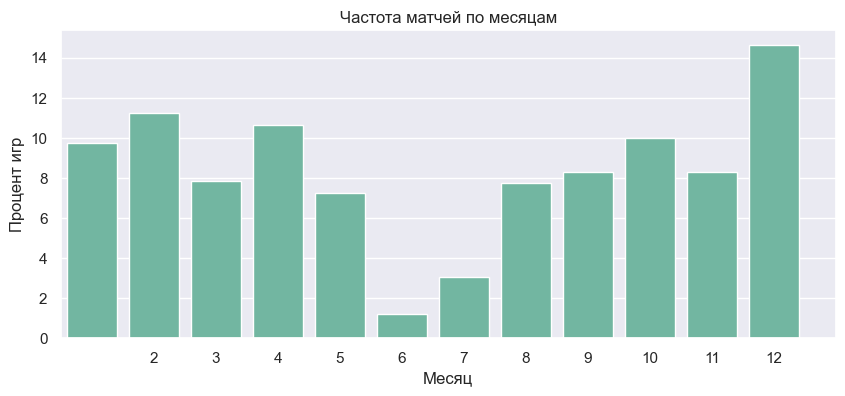

In [12]:
plt.figure(figsize=(10, 4))

sns.countplot(data=df, x=df['Date'].apply(lambda x: x.month), stat='percent')

plt.xticks(np.arange(1, 13))
plt.xlabel('Месяц')
plt.ylabel('Процент игр')
plt.title('Частота матчей по месяцам');

- Чаще всего игры проводят в декабре, а реже всего - в июне

- Получается, что летом игры проводятся меньше, чем зимой

### Команды

Посмотрим, как много команды играли в английской премьер лиге

<Axes: xlabel='count', ylabel='HomeTeam'>

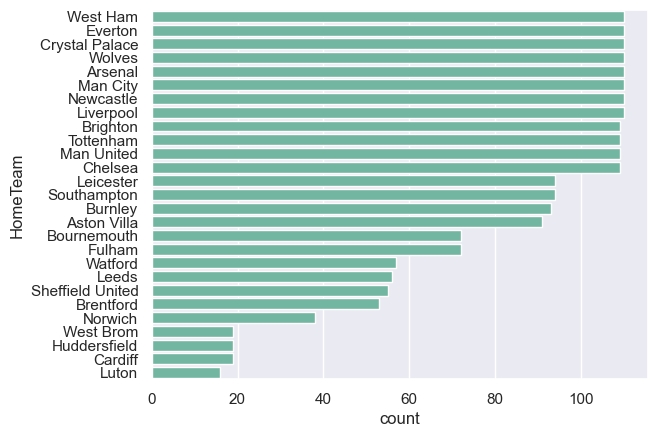

In [13]:
sns.countplot(df.HomeTeam, order=df['HomeTeam'].value_counts().index)

Команды играют разное количество матчей, потому что многие вылетали из этой лиги в низшую из-за плохих результатов. Постояльцы лиги - почти половина рассматриваемых команд. Хаддерсфилд, Кардифф, Лутон - играли в лиге всего один сезон с 2018 года

### Голы

In [14]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

Посмотрим, как голы забивали команды, играющие в гостях и дома

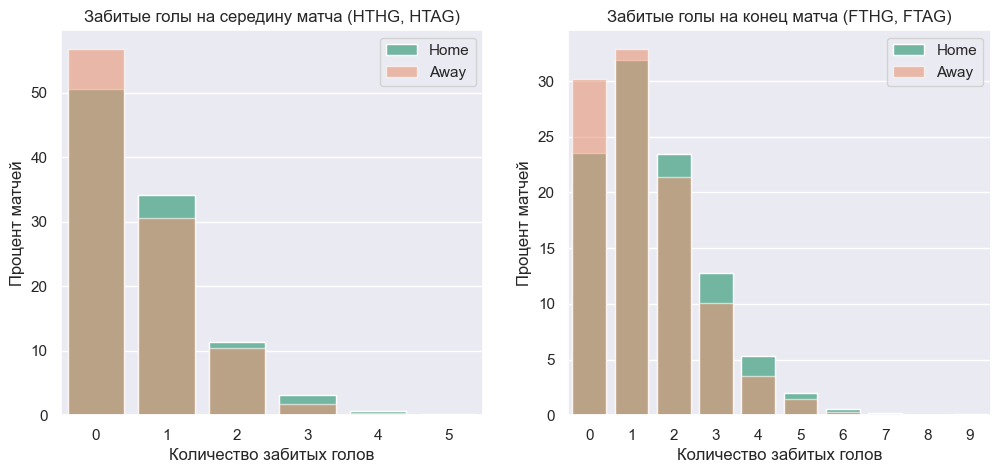

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
sns.countplot(data=df, x=df.FTHG, alpha=1, stat='percent', label='Home')
sns.countplot(data=df, x=df.FTAG, alpha=0.6, stat='percent', label='Away')

plt.legend()
plt.xlabel('Количество забитых голов')
plt.ylabel('Процент матчей')
plt.title('Забитые голы на конец матча (FTHG, FTAG)')


plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HTHG, alpha=1, stat='percent', label='Home')
sns.countplot(data=df, x=df.HTAG, alpha=0.6, stat='percent', label='Away')

plt.legend()
plt.xlabel('Количество забитых голов')
plt.ylabel('Процент матчей')
plt.title('Забитые голы на середину матча (HTHG, HTAG)');

__Вывод:__ 
- Домашние команды чаще забивают больше 1 гола, чем гостевые команды. Это может говорить о том, что домашние команды имеют преимущество и чаще побеждают, забивая больше
- На момент первой половины матча забивают меньше голов. В половине матчей гостевая или домашняя команды вообще не забивали, зато на момент конца игры таких матчей около 30 процентов

### Результаты матчей

Посмотрим, как результат матча зависит от того, играет команда дома или нет

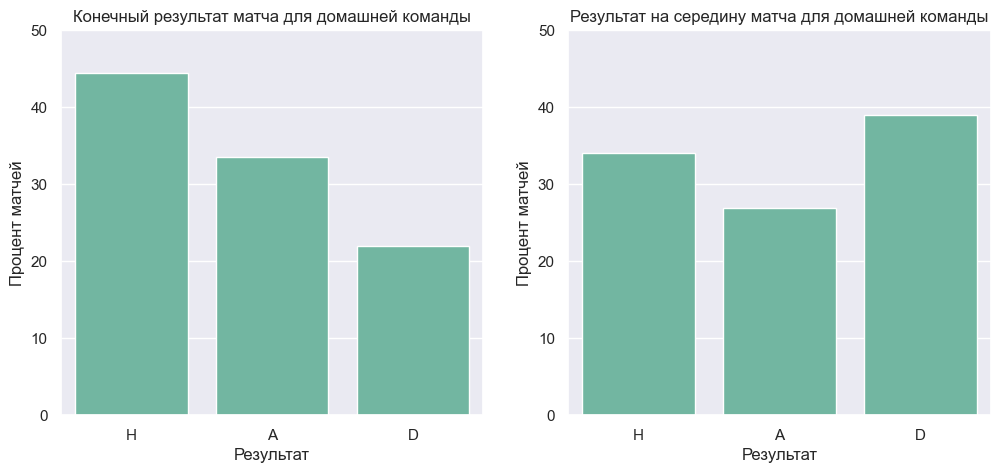

In [143]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.FTR, order=df['FTR'].value_counts().index, stat='percent')

plt.xlabel('Результат')
plt.ylabel('Процент матчей')
plt.title('Конечный результат матча для домашней команды')
plt.ylim(0, 50)


plt.subplot(1, 2, 2)
sns.countplot(data=df, x=df.HTR, order=df['FTR'].value_counts().index, stat='percent')
plt.xlabel('Результат')
plt.ylabel('Процент матчей')
plt.title('Результат на середину матча для домашней команды')
plt.ylim(0, 50);

__Вывод:__ 
- В середине матча чаще всего команды еще играют вничью, зато к концу матча ничья будет реже всего и побеждает чаще домашняя команда
- Заметно, что и в середине, и в конце домашняя команда в среднем играет лучше гостевой

### Игровая статистика

#### Удары по воротам

Посмотрим на распределение ударов по воротам в зависимости от того, дома играет команда или нет

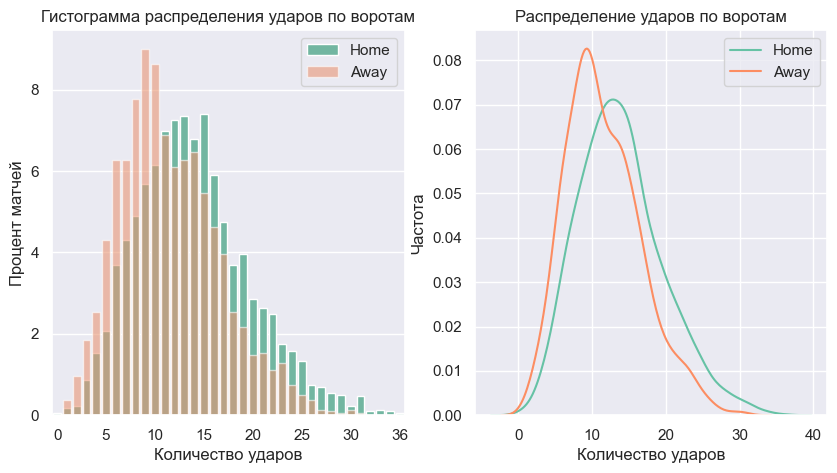

In [17]:
# Удары по воротам

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HS, stat='percent', label='Home')
sns.countplot(data=df, x=df.AS, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HS), 5))
plt.xlabel('Количество ударов')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения ударов по воротам')
plt.legend()

# 2 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HS, label='Home')
sns.kdeplot(df.AS, label='Away')

plt.xlabel('Количество ударов')
plt.ylabel('Частота')
plt.title('Распределение ударов по воротам')
plt.legend();

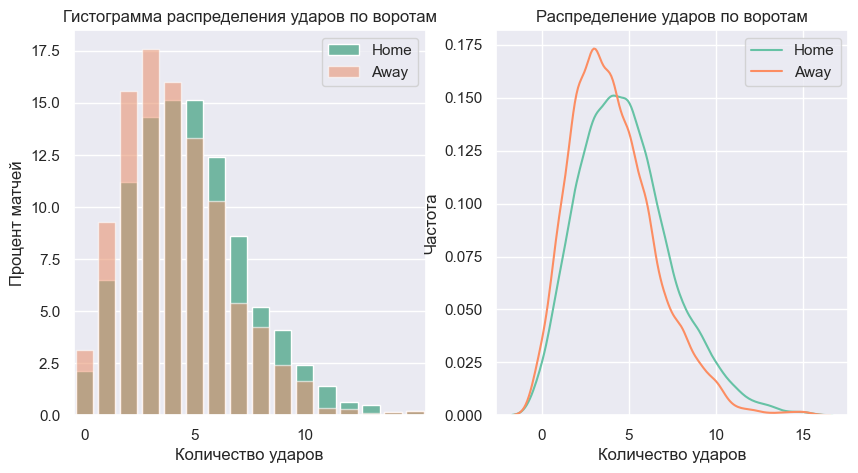

In [18]:
# Попадания по воротам

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HST, stat='percent', label='Home')
sns.countplot(data=df, x=df.AST, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HST), 5))
plt.xlabel('Количество ударов')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения ударов по воротам')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HST, label='Home')
sns.kdeplot(df.AST, label='Away')

plt.xlabel('Количество ударов')
plt.ylabel('Частота')
plt.title('Распределение ударов по воротам')
plt.legend();

__Вывод:__ 
- Домашние команды чаще бьют по воротам и чаще попадают по ним, чем гостевые команды
- Это еще один признак того, что домашние играют лучше гостевых

### Угловые удары

Угловой удар - это хорошая возможность забить гол. Посмотрим, как количество угловых влияет на результат домашней команды

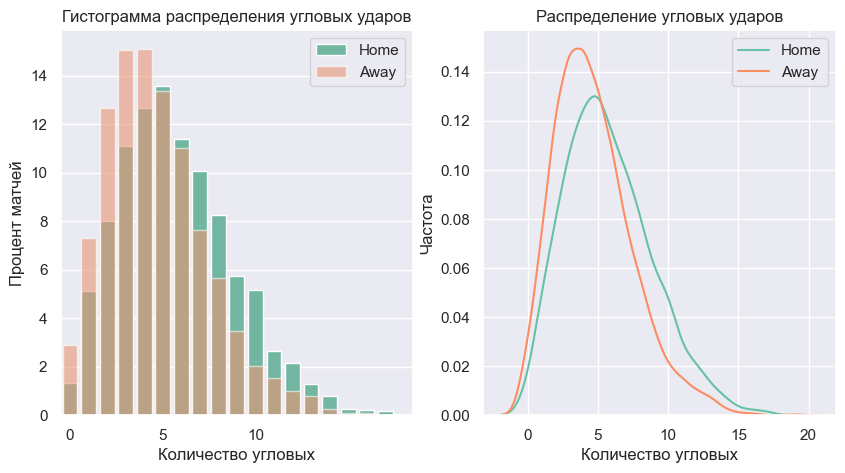

In [19]:
# Угловые

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HC, stat='percent', label='Home')
sns.countplot(data=df, x=df.AC, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HST), 5))
plt.xlabel('Количество угловых')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения угловых ударов')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HC, label='Home')
sns.kdeplot(df.AC, label='Away')

plt.xlabel('Количество угловых')
plt.ylabel('Частота')
plt.title('Распределение угловых ударов')
plt.legend();

__Вывод:__ действительно, угловые чаще появляются у домашних команд, которые чаще выигрывают

Часто мяч после удара по воротам улетает за линию и после этого назначается угловой удар, поэтому количество угловых должно коррелировать с ударами.  
# На это посмотрим на другой большой хитмапе

### Нарушения правил

Проигрывающая команда часто может быть более агрессивной из-за нужды в отыгрыше и эмоций от проигрывания. Тем не менее, для некоторых команд агрессивная игра - собственный стиль и это может не коррелировать с результатом игры. 
- Посмотрим, как количество нарушений правил зависит от того, где играет команда
- Посмотрим на среднее количество нарушений у разных команд
- Посмотрим, как судья влияет на количество нарушений

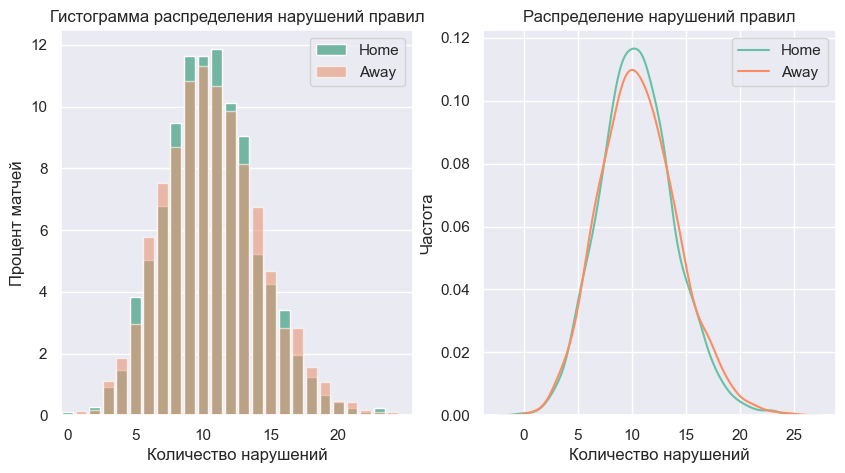

In [20]:
# Нарушения

plt.figure(figsize=(10, 5))

# 1 график
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df.HF, stat='percent', label='Home')
sns.countplot(data=df, x=df.AF, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HF), 5))
plt.xlabel('Количество нарушений')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения нарушений правил')
plt.legend()

# 1 график
plt.subplot(1, 2, 2)
sns.kdeplot(df.HF, label='Home')
sns.kdeplot(df.AF, label='Away')

plt.xlabel('Количество нарушений')
plt.ylabel('Частота')
plt.title('Распределение нарушений правил')
plt.legend();

__Вывод:__ похоже на то, что в целом ситуация по нарушениям не зависит от роли команды, но распределения похожи на нормальное и у домашних команд имеет более тонкие хвосты

### Желтые и красные карточки

В целом, они тоже отражают нарушения правил, но более жесткие. 
- За серьезное нарушение дают желтую карточку. Получив две таких карточки в одном матче, футболист удаляется с поля и у команды остается на одного игрока меньше
- За очень серьезное нарушение дают красную карточку. Она работает так же, как две желтые

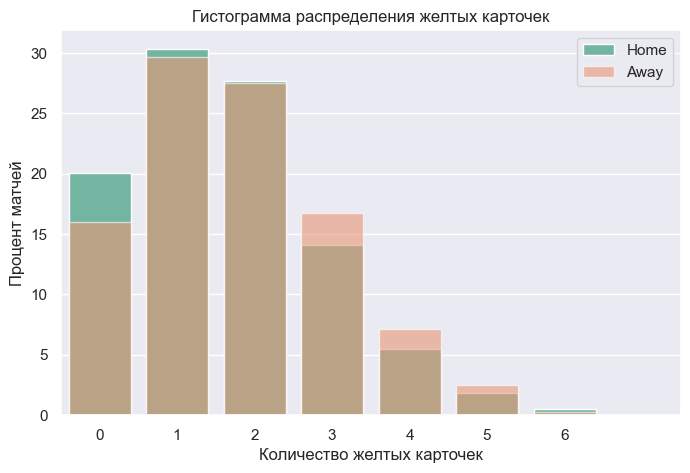

In [21]:
# Желтые

plt.figure(figsize=(8, 5))

# 1 график
sns.countplot(data=df, x=df.HY, stat='percent', label='Home')
sns.countplot(data=df, x=df.AY, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HY) + 1))
plt.xlabel('Количество желтых карточек')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения желтых карточек')
plt.legend()

__Вывод:__ интересная статистика, гостевые команды обычно получают больше желтых карточек. Возможно, наша гипотеза может подтвердиться

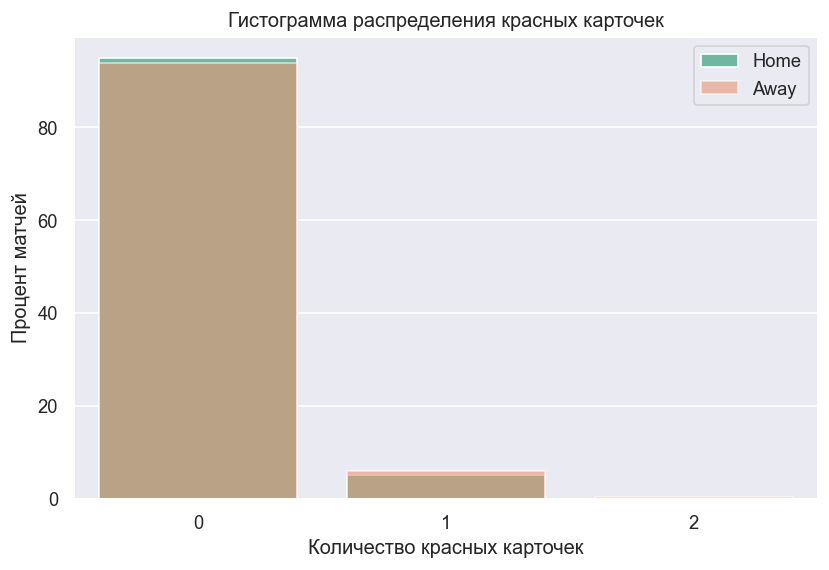

In [22]:
# Красные

plt.figure(figsize=(8, 5), dpi=120)

# 1 график
sns.countplot(data=df, x=df.HR, stat='percent', label='Home')
sns.countplot(data=df, x=df.AR, stat='percent', label='Away', alpha=0.6)

plt.xticks(np.arange(0, max(df.HR) + 1))
plt.xlabel('Количество красных карточек')
plt.ylabel('Процент матчей')
plt.title('Гистограмма распределения красных карточек')
plt.legend();

__Вывод:__ С красными карточками такой ситуации не наблюдается. Практически полное равенство. Скорее всего потому что их получают слишком редко

### Нарушения по командам

Посчитаем среднее количество нарушений и желтых карточек у разных команд и посмотрим как рейтинг силы (Elo rating) с этим связан

In [23]:
df.loc[:, ['HomeTeam', 'AwayTeam', 'HF', 'AF', 'HY', 'AY', 'HR', 'AY', 'Referee', 'Elo_HomeTeam', 'Elo_AwayTeam']].head()

,HomeTeam,AwayTeam,HF,AF,HY,AY,HR,AY,Referee,Elo_HomeTeam,Elo_AwayTeam
0,Brighton,Man City,10,3,2,0,0,0,J Gillett,1748.398682,2038.480591
1,Man United,Sheffield United,7,9,0,1,0,1,M Salisbury,1793.209839,1551.766602
2,Everton,Liverpool,6,13,0,3,0,3,A Madley,1692.962402,1923.581787
3,Crystal Palace,Newcastle,10,15,3,3,0,3,T Bramall,1708.831055,1811.576782
4,Wolves,Bournemouth,10,17,4,1,0,1,S Attwell,1711.067993,1695.033447


Так как столбцы отдельно задают информацию для домашней и гостевой команд, соединим

In [24]:
df_fouls = pd.concat([df.loc[:, ['HomeTeam', 'HF', 'HY','HR', 'Referee', 'Elo_HomeTeam']].rename(columns=
                                                                                            {'HomeTeam': 'Team',
                                                                                              'HF': 'F',
                                                                                              'HY': 'Y',
                                                                                              'HR': 'R',
                                                                                             'Elo_HomeTeam': 'Elo'}), 
                      df.loc[:, ['AwayTeam', 'AF', 'AY', 'AR', 'Referee', 'Elo_AwayTeam']].rename(columns=
                                                                                            {'AwayTeam': 'Team',
                                                                                               'AF': 'F',
                                                                                               'AY': 'Y',
                                                                                               'AR': 'R',
                                                                                              'Elo_AwayTeam': 'Elo'})],
                    ignore_index=True)
df_fouls

,Team,F,Y,R,Referee,Elo
0,Brighton,10,2,0,J Gillett,1748.398682
1,Man United,7,0,0,M Salisbury,1793.209839
2,Everton,6,0,0,A Madley,1692.962402
3,Crystal Palace,10,3,0,T Bramall,1708.831055
4,Wolves,10,4,0,S Attwell,1711.067993
...,...,...,...,...,...,...
4323,Tottenham,12,2,0,M Atkinson,1914.848877
4324,Chelsea,8,1,0,C Kavanagh,1837.004272
4325,Crystal Palace,11,2,0,M Dean,1692.951660
4326,Cardiff,9,1,0,K Friend,1576.490356


Сгруппируем показатели по командам:

In [25]:
df_fouls_grouped = df_fouls.groupby('Team')[['F', 'Y', 'R', 'Elo']].agg('mean')
df_fouls_grouped.sort_values('F', ascending=False)  # сортируем по убыванию нарушений

,F,Y,R,Elo
Team,,,,
Watford,11.903509,1.833333,0.087719,1659.161815
Leeds,11.848214,2.160714,0.062500,1707.816230
Sheffield United,11.394495,2.018349,0.082569,1638.439996
Luton,11.375000,1.875000,0.000000,1602.717472
Fulham,11.263889,1.951389,0.062500,1652.325582
Aston Villa,11.192308,2.005495,0.049451,1730.723947
Southampton,11.191489,1.648936,0.063830,1685.329871
Man United,11.155251,1.922374,0.041096,1857.642832
Crystal Palace,11.122727,1.709091,0.050000,1717.877086


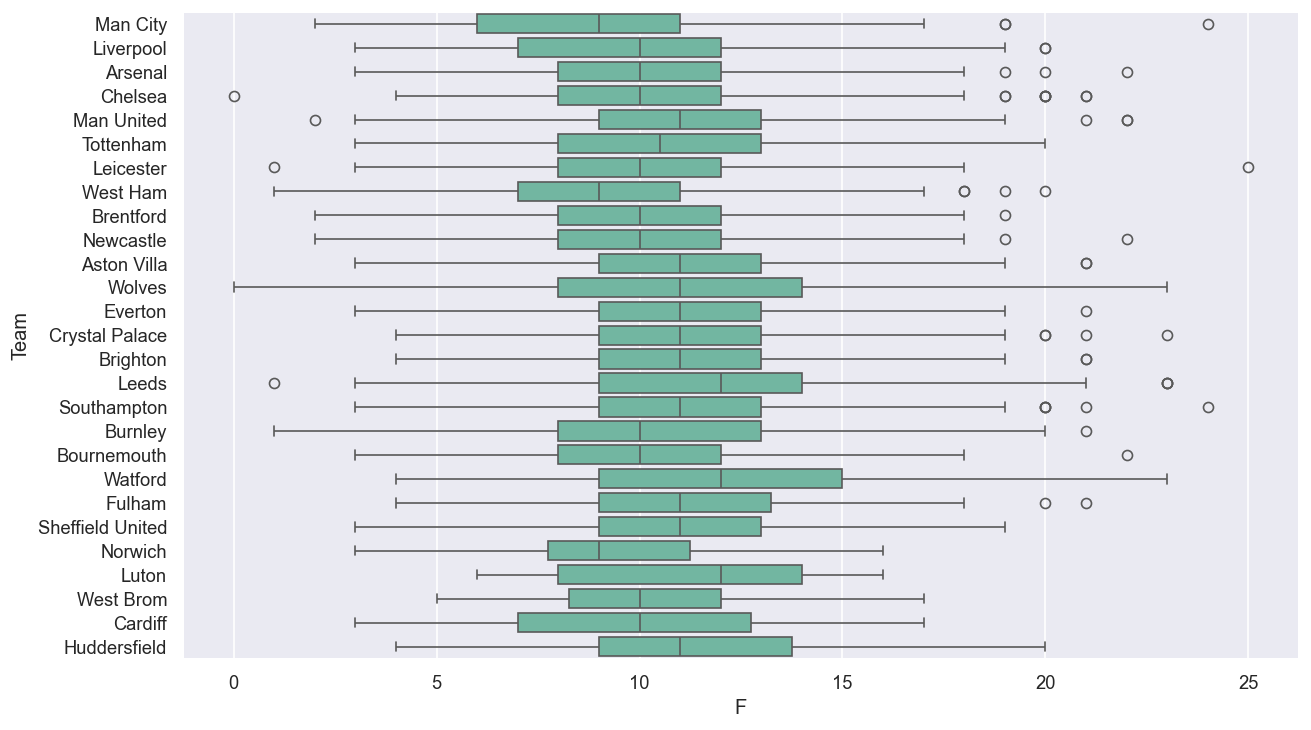

In [26]:
plt.figure(figsize=(12, 7), dpi=120)

sns.boxplot(data=df_fouls, x='F', y='Team', order=(df_fouls_grouped.sort_values('Elo', ascending=False)).index);
# отсортировали по убыванию рейтинга силы

__Вывод:__ 
- Самые фолящие команды Watford, Leeds, Sheffield и т.д. - команды-аутсайдеры, то есть самые слабые
- Команды-лидеры могут фолить как много, так и мало. Тут нет явной связи

Посмотрим на зависимость между количеством фолов и рейтингом силы 

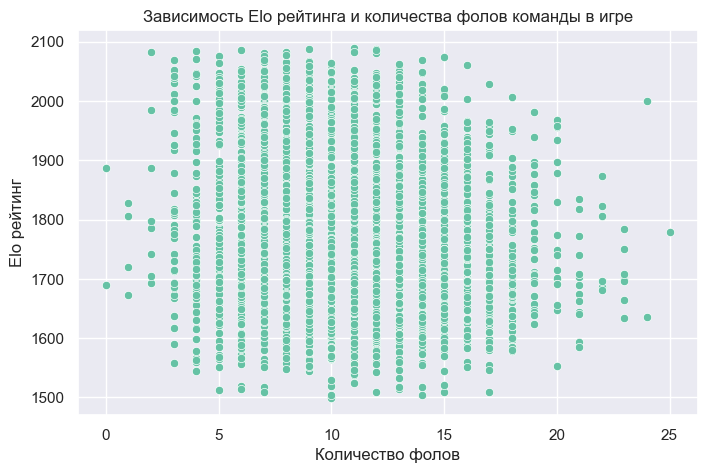

In [27]:
plt.figure(figsize=(8, 5))
plt.title('Зависимость Elo рейтинга и количества фолов команды в игре')
plt.xlabel('Количество фолов')
plt.ylabel('Elo рейтинг')

sns.scatterplot(data=df_fouls, x='F', y='Elo');

__Вывод:__ зависимости не видно

Посмотрим на зависимость между средними фолами и Elo рейтингами команд, возможно там что-то найдется?

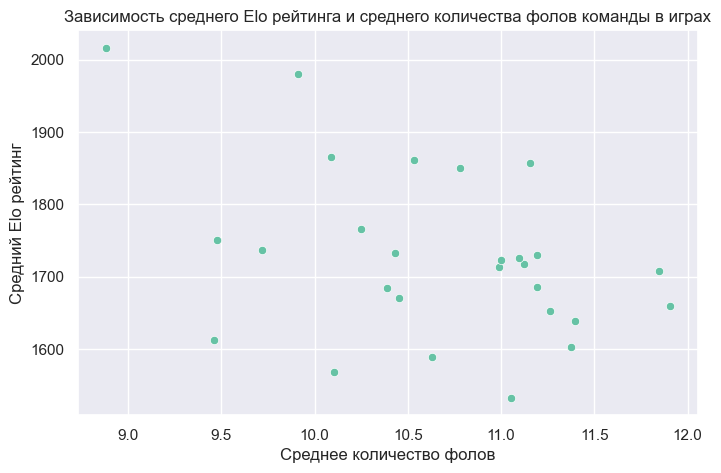

In [28]:
plt.figure(figsize=(8, 5))
plt.title('Зависимость среднего Elo рейтинга и среднего количества фолов команды в играх')
plt.xlabel('Среднее количество фолов')
plt.ylabel('Средний Elo рейтинг')

sns.scatterplot(data=df_fouls_grouped, x='F', y='Elo');

__На первый взгляд может показаться, что связь есть. Проверим корреляцию__

In [29]:
df_fouls.head()

,Team,F,Y,R,Referee,Elo
0,Brighton,10,2,0,J Gillett,1748.398682
1,Man United,7,0,0,M Salisbury,1793.209839
2,Everton,6,0,0,A Madley,1692.962402
3,Crystal Palace,10,3,0,T Bramall,1708.831055
4,Wolves,10,4,0,S Attwell,1711.067993


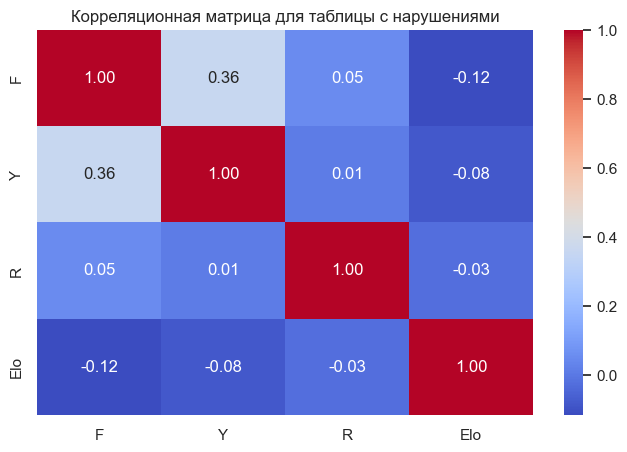

In [30]:
plt.figure(figsize=(8, 5))
plt.title('Корреляционная матрица для таблицы с нарушениями')

sns.heatmap(df_fouls.loc[:, ['F', 'Y', 'R', 'Elo']].corr(),
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm');

__Вывод:__ 
- Линейная корреляция между количеством фолов и рейтингом силы довольно маленькая, но отрицательная
- Корреляция между количеством фолов и полученными желтыми карточками повыше, но все еще не очень большая. Хотя эту связь объяснить легко: нарушайте правила больше и получите больше желтых карточек

### Судьи

Посмотрим как часто разные судьи работают на матчах

In [31]:
referee_value_counts = df['Referee'].value_counts()
referee_value_counts

Referee
A Taylor        165
M Oliver        162
P Tierney       141
C Pawson        131
S Attwell       123
C Kavanagh      116
M Atkinson      113
M Dean          107
A Marriner      106
D Coote         103
J Moss          101
K Friend         95
S Hooper         92
A Madley         88
G Scott          69
P Bankes         67
R Jones          61
D England        52
L Mason          46
J Brooks         41
J Gillett        40
M Salisbury      29
T Robinson       21
L Probert        18
T Harrington     17
T Bramall        14
S Barrott        12
R East           10
D Bond            8
J Smith           4
S Allison         3
L Smith           2
R Madley          2
R Welch           1
A Moss            1
S Scott           1
O Langford        1
S Singh           1
Name: count, dtype: int64

Посмотрим, как сильно по-разному могут работать судьи

Соберем датафрейм, где просуммируем все нарушения и карточки обеих команд в матче, а потом проанализируем это

Чтобы убрать выбросы, возьмем только тех судей, которые отработали хотя бы 10 матчей

In [32]:
df_ref = df.loc[:, ['HF', 'AF', 'HY', 'AY', 'HR', 'AR', 'Referee']]
df_ref['F'] = df['HF'] + df['AF']
df_ref['Y'] = df['HY'] + df['AY']
df_ref['R'] = df['HR'] + df['AR']

df_ref_merged = df_ref.merge(referee_value_counts, on='Referee', how='inner')
df_ref_merged[df_ref_merged['count'] >= 10]

,HF,AF,HY,AY,HR,AR,Referee,F,Y,R,count
0,10,3,2,0,0,0,J Gillett,13,2,0,40
1,13,9,1,2,0,0,J Gillett,22,3,0,40
2,7,15,3,0,0,0,J Gillett,22,3,0,40
3,16,14,2,4,0,0,J Gillett,30,6,0,40
4,13,12,3,3,0,0,J Gillett,25,6,0,40
...,...,...,...,...,...,...,...,...,...,...,...
2159,9,7,4,1,0,0,R East,16,5,0,10
2160,17,16,1,2,0,0,R East,33,3,0,10
2161,14,11,4,2,0,0,R East,25,6,0,10
2162,7,9,1,4,0,0,R East,16,5,0,10


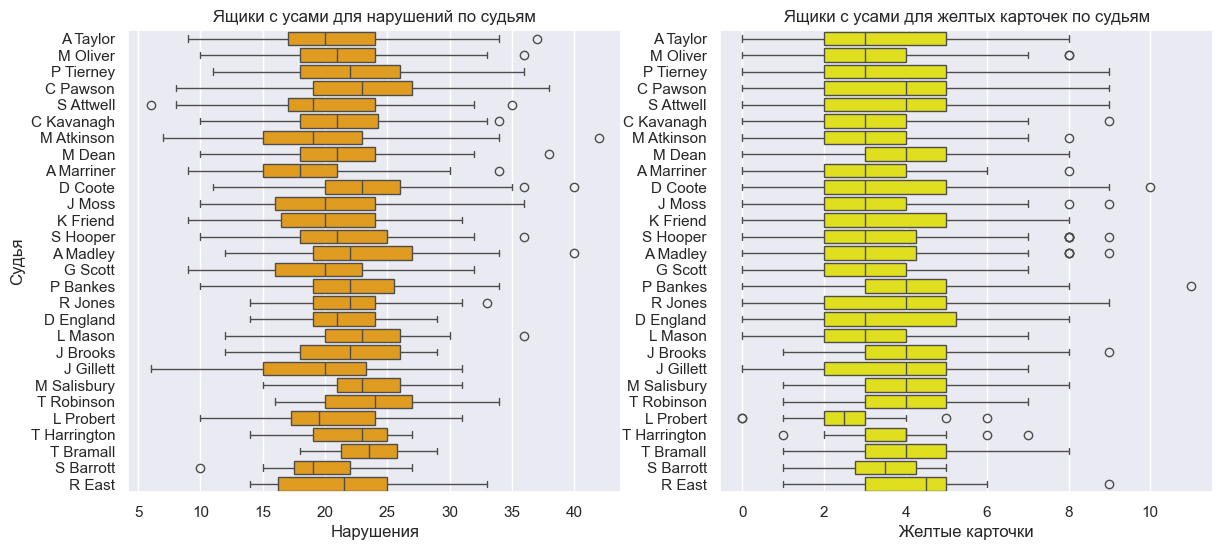

In [33]:
plt.figure(figsize=(14, 6))

# 1 график
plt.subplot(1, 2, 1)
sns.boxplot(df_ref_merged[df_ref_merged['count'] >= 10].sort_values('count', ascending=False), 
            x='F', y='Referee', color='orange')

plt.title('Ящики с усами для нарушений по судьям')
plt.xlabel('Нарушения')
plt.ylabel('Судья')


# 2 график
plt.subplot(1, 2, 2)
sns.boxplot(df_ref_merged[df_ref_merged['count'] >= 10].sort_values('count', ascending=False)
            , x='Y', y='Referee', color='yellow')

plt.title('Ящики с усами для желтых карточек по судьям')
plt.xlabel('Желтые карточки')
plt.ylabel('')
plt.yticks(labels=None, ticks=None);

__Вывод:__ Судьи могут по-разному судить матчи. Возможно это может отразиться на результате игры. На это посмотрим глубже на этапе машинного обучения. Вручную отбирать матчи по строгости тренеров будет сложно

### Коэффициенты букмекеров

Соберем датафрейм, в котором рассмотрим связь силы команд и коэффициентов на их победы

In [34]:
df_books = df.loc[:, ['HomeTeam', 'AwayTeam', 'AvgH', 'AvgD', 'AvgA', 'Elo_HomeTeam', 'Elo_AwayTeam']]
df_books

,HomeTeam,AwayTeam,AvgH,AvgD,AvgA,Elo_HomeTeam,Elo_AwayTeam
0,Brighton,Man City,6.568000,4.890000,1.426000,1748.398682,2038.480591
1,Man United,Sheffield United,1.304000,6.056000,8.154000,1793.209839,1551.766602
2,Everton,Liverpool,7.048000,4.910000,1.410000,1692.962402,1923.581787
3,Crystal Palace,Newcastle,2.742000,3.620000,2.410000,1708.831055,1811.576782
4,Wolves,Bournemouth,2.698000,3.586000,2.476000,1711.067993,1695.033447
...,...,...,...,...,...,...,...
2159,Newcastle,Tottenham,3.821667,3.420000,2.053333,1670.871338,1914.848877
2160,Huddersfield,Chelsea,6.276667,3.970000,1.590000,1567.101318,1837.004272
2161,Fulham,Crystal Palace,2.466667,3.360000,2.950000,1633.799683,1692.951660
2162,Bournemouth,Cardiff,1.895000,3.538333,4.388333,1673.780518,1576.490356


Попробуем сразу понять, связаны ли эти значения с помощью коэффициента корреляции

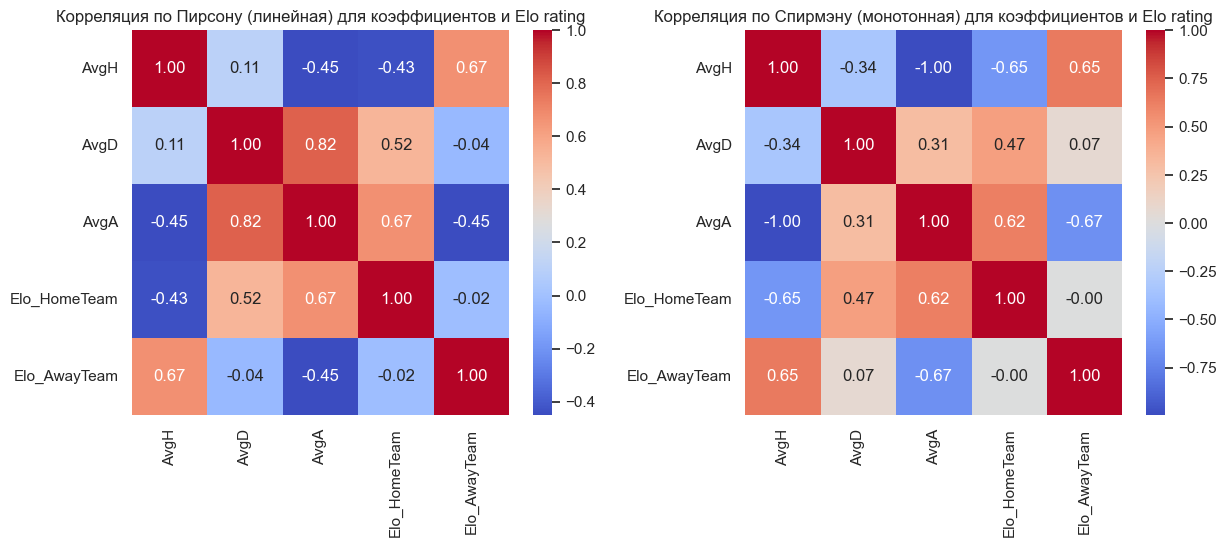

In [35]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.title('Корреляция по Пирсону (линейная) для коэффициентов и Elo rating')

sns.heatmap(df_books.corr(method='pearson', numeric_only=True),
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm')

plt.subplots_adjust(wspace=0.3)
plt.subplot(1, 2, 2)
plt.title('Корреляция по Спирмэну (монотонная) для коэффициентов и Elo rating')

sns.heatmap(df_books.corr(method='spearman', numeric_only=True),
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm');

__Выводы:__ 
- Вероятно, связь (AvgH и AvgD), (AvgA и AvgD) совсем не линейная, потому что корреляции сильно отличаются 
- Связь между AvgH и AvgA точно не линейная, но обратная
- Связь между рейтингом Elo и коэффициентами примерно линейная. Чем больше сила команды, тем меньше коэффициент на ее победу (то есть она более вероятна) и наоборот
- Интересно, что связь между коэффициентом на ничью (AvgD) и рейтингом домашней команды (Elo_HomeTeam) прямая, а вот между AvgD и Elo_AwayTeam связи нет! Это можно объяснить так: чем сильнее домашняя команда, тем более вероятна ее победа вероятно и тем менее вероятна ничья. А вот с гостевой командой так не работает

__В общем, давайте смотреть глубже__

Посмотрим на распределение коэффициентов

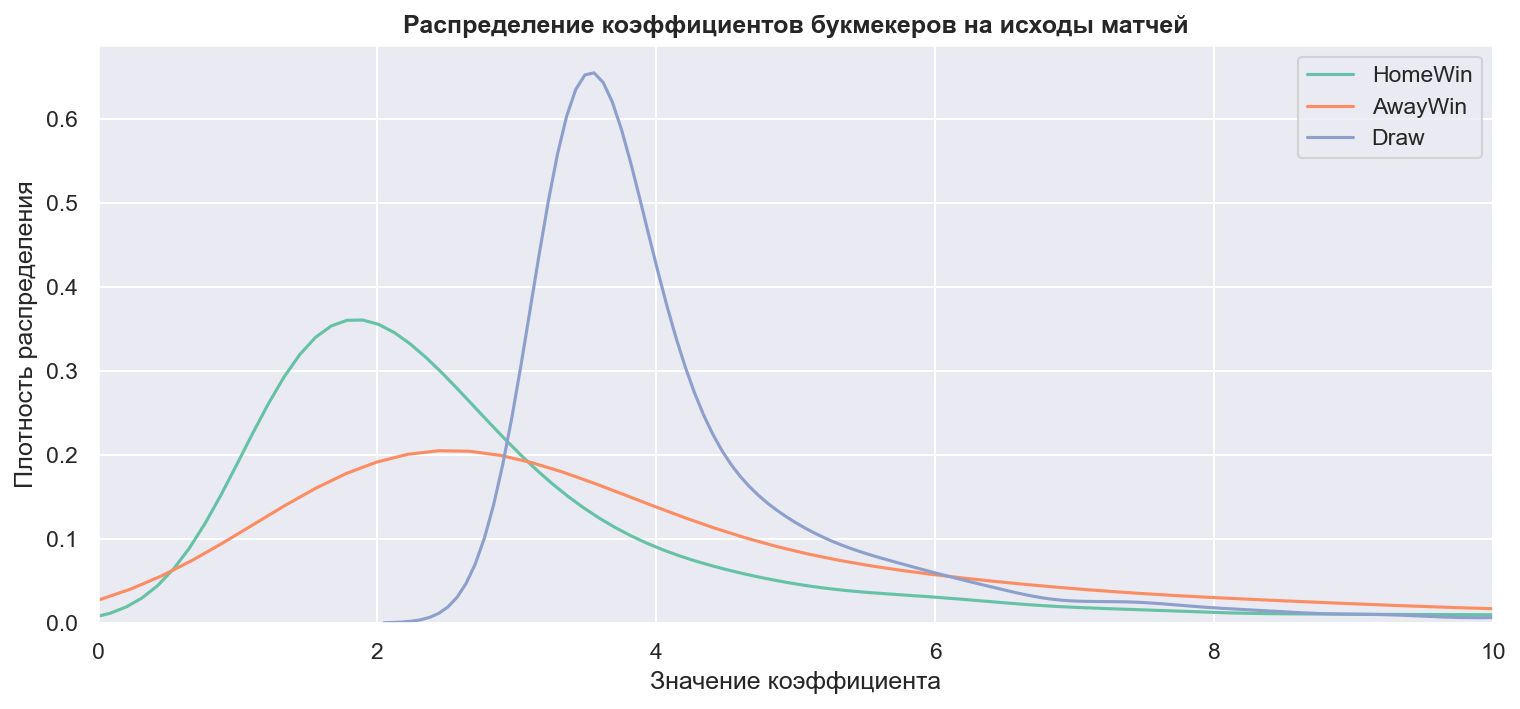

In [140]:
plt.figure(figsize=(12, 5), dpi=150)

sns.kdeplot(data=df_books, x='AvgH', label='HomeWin')
sns.kdeplot(data=df_books, x='AvgA', label='AwayWin')
sns.kdeplot(data=df_books, x='AvgD', label='Draw')

plt.xlim(0, 10)
plt.title('Распределение коэффициентов букмекеров на исходы матчей', weight='bold')
plt.xlabel('Значение коэффициента')
plt.ylabel('Плотность распределения')
plt.legend();

__Вывод:__ 
- Коэффициенты на домашние команды чаще меньше (то есть букмекеры больше всего верят в них, поэтому дают на них наименьшее увеличение суммы при выигрыше ставки), чем на гостевые
- Коэффициенты на ничью самые большие, то есть в них верят меньше всего
- Это подтверждается графиком в начале ноутбука, где показано, что чаще всего выигрывает домашняя команда, а реже всего случается ничья

Посмотрим на связи между коэффициентами

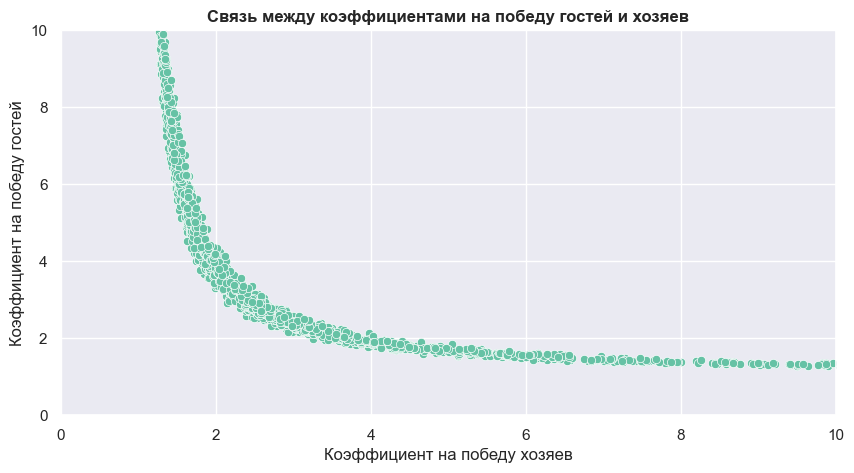

In [109]:
plt.figure(figsize=(10, 5))

sns.scatterplot(data=df_books, x='AvgH', y='AvgA')

plt.title('Связь между коэффициентами на победу гостей и хозяев', weight='bold')
plt.xlabel('Коэффициент на победу хозяев')
plt.ylabel('Коэффициент на победу гостей')

plt.xlim(0, 10)
plt.ylim(0, 10);

__Вывод:__ Связь, очевидно, обратная. Чем больше шансов у одной команды, тем меньше на нее коэффициенты и тем больше коэффициенты на ее противника

Иногда значения коэффициентов могут быть слишком большими, прологарифмируем все коэффициенты букмекеров в датафрейме, чтобы сгладить этот эффект. Elo rating логарифмировать не будем, т.к. там значения как раз важны такие, какие они есть

In [53]:
df_log = df_books[['AvgH', 'AvgA', 'AvgD']].apply(np.log)

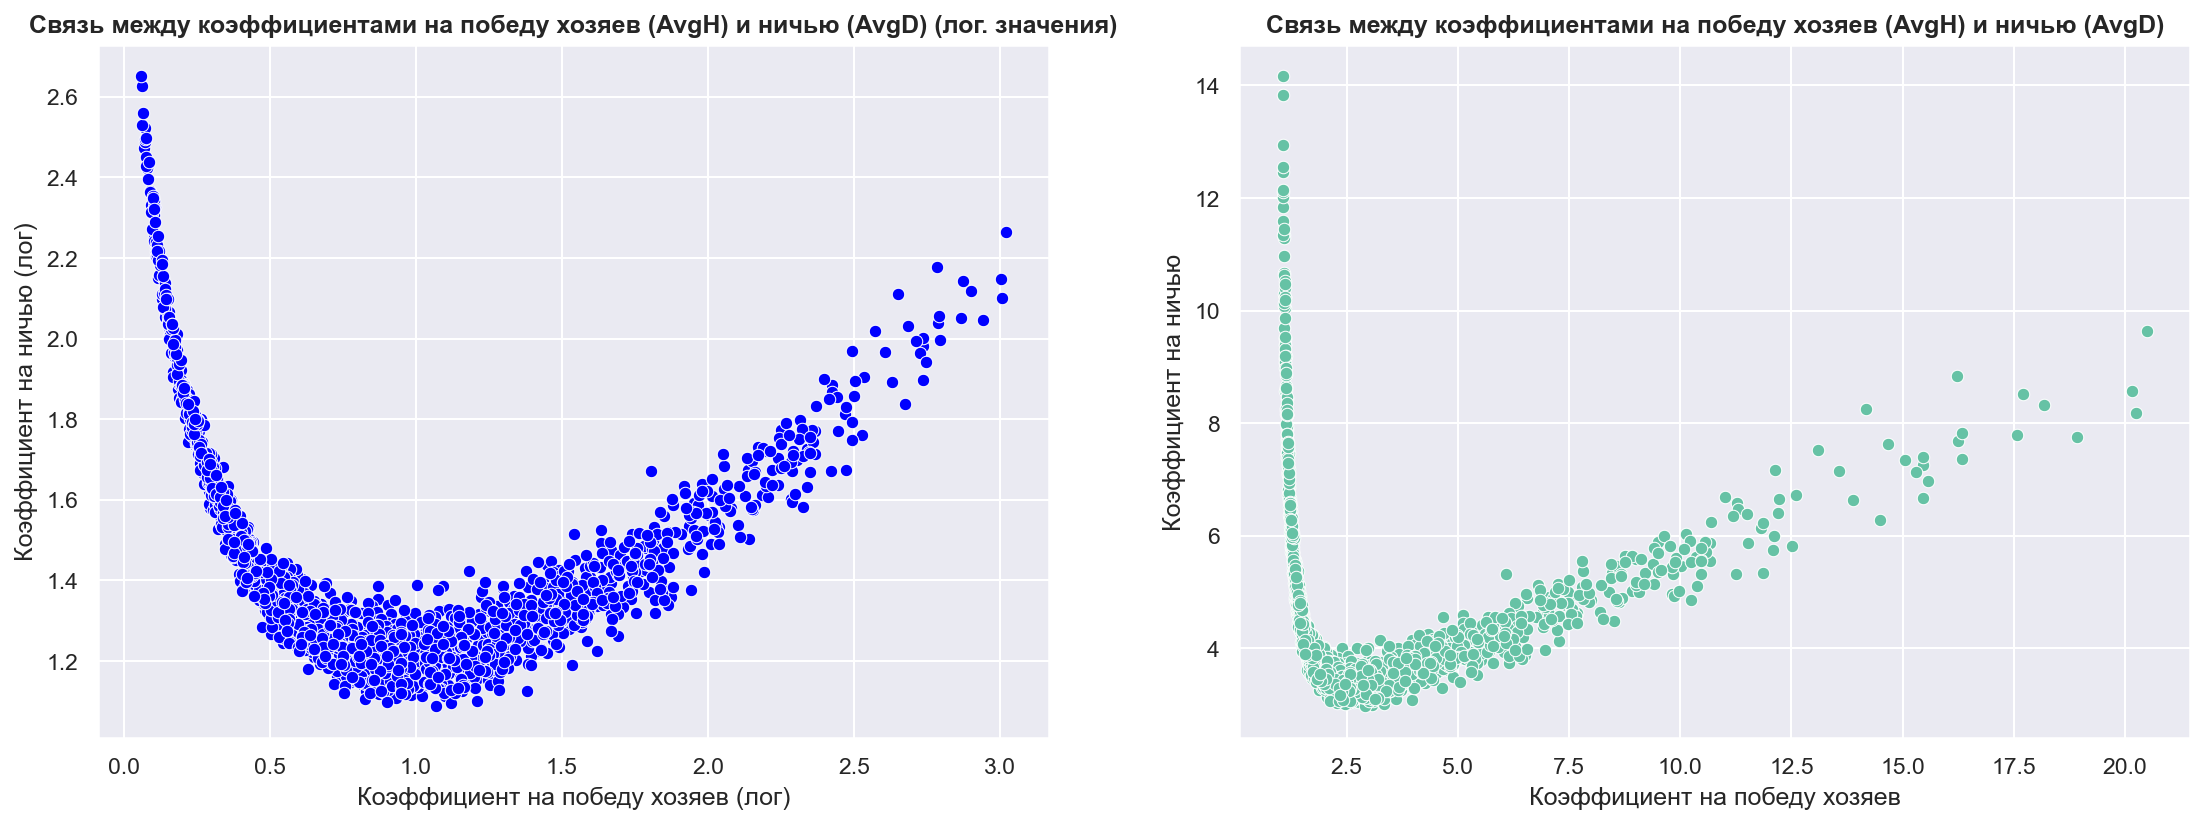

In [120]:
plt.figure(figsize=(18, 6), dpi=150)

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_log, x='AvgH', y='AvgD', color='blue')
plt.title('Связь между коэффициентами на победу хозяев (AvgH) и ничью (AvgD) (лог. значения)', weight='bold')
plt.xlabel('Коэффициент на победу хозяев (лог)')
plt.ylabel('Коэффициент на ничью (лог)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_books, x='AvgH', y='AvgD')

plt.title('Связь между коэффициентами на победу хозяев (AvgH) и ничью (AvgD)', weight='bold')
plt.xlabel('Коэффициент на победу хозяев')
plt.ylabel('Коэффициент на ничью');

__Вывод:__ Связь квадратичная. Если букмекеры уверены в победе одной команды, то коэффициенты на ничью или на победу другой будут большими. Если же команды более менее равные и букмекеры не уверены, то вероятность ничьей растет и поэтому коэффициенты на нее падают.

Аналогично будет работать с коэффициентами на гостей и ничью:

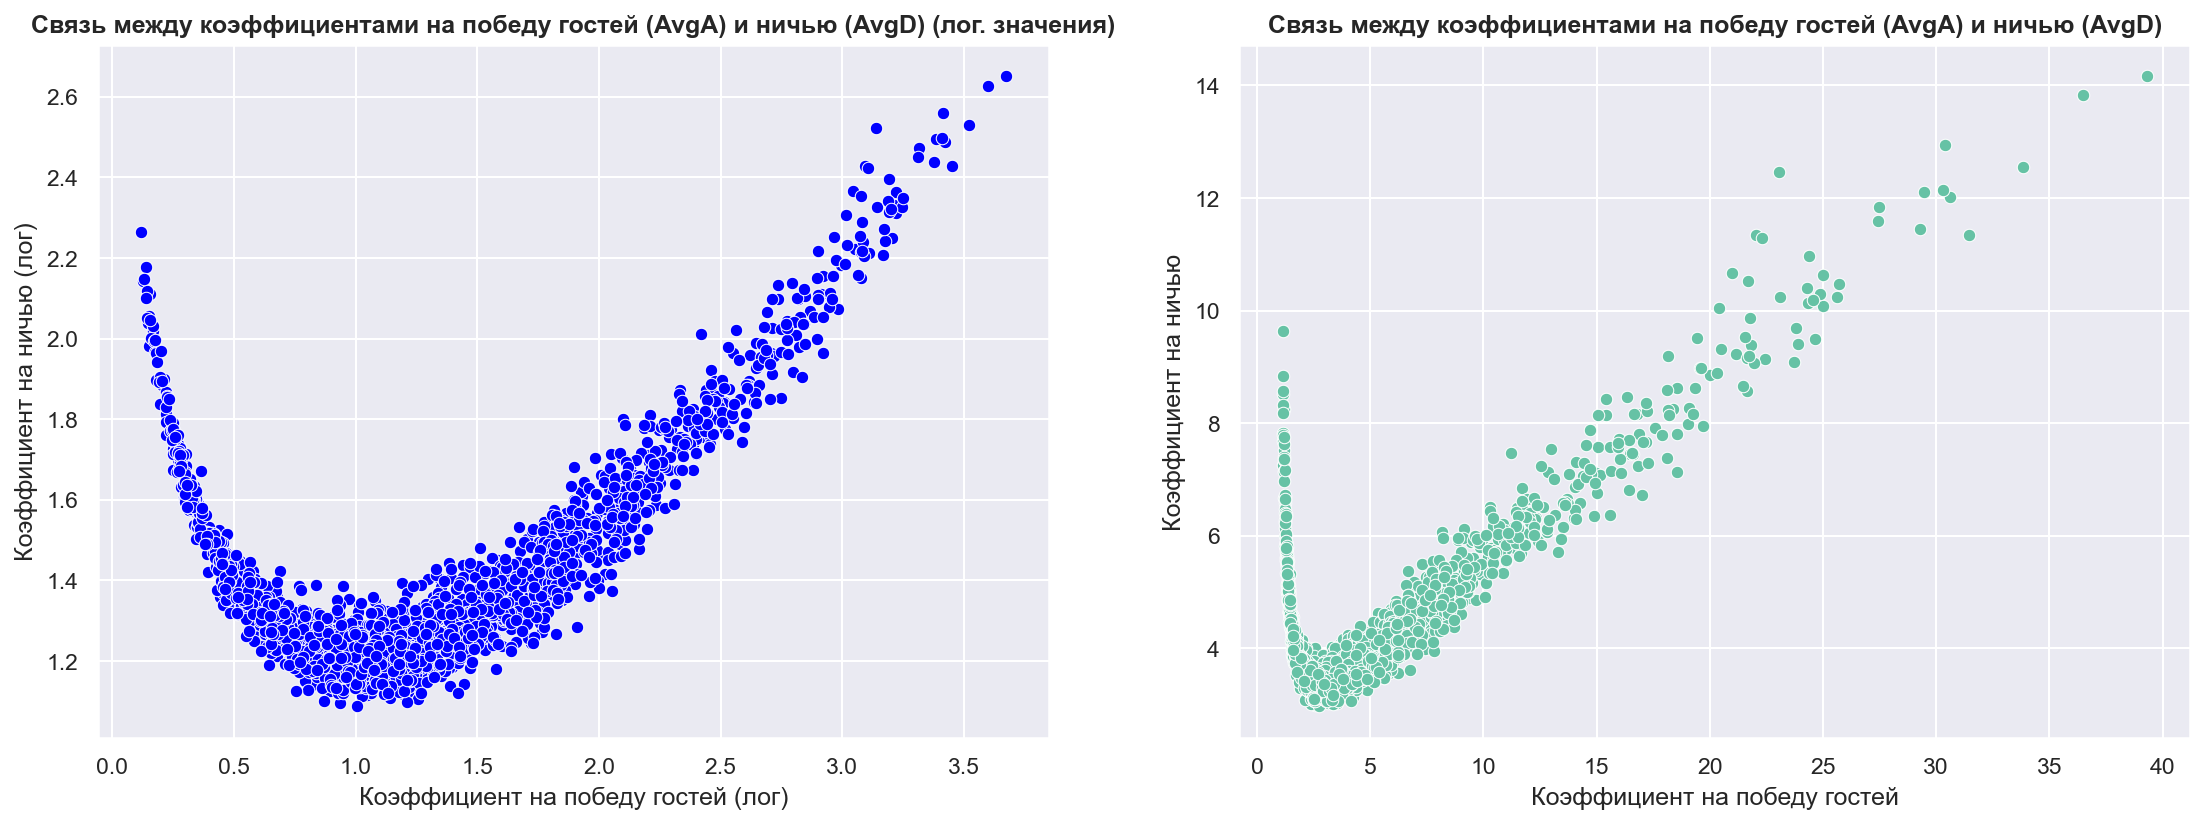

In [119]:
plt.figure(figsize=(18, 6), dpi=150)

plt.subplot(1, 2, 1)
sns.scatterplot(data=df_log, x='AvgA', y='AvgD', color='blue')
plt.title('Связь между коэффициентами на победу гостей (AvgA) и ничью (AvgD) (лог. значения)', weight='bold')
plt.xlabel('Коэффициент на победу гостей (лог)')
plt.ylabel('Коэффициент на ничью (лог)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_books, x='AvgA', y='AvgD')

plt.title('Связь между коэффициентами на победу гостей (AvgA) и ничью (AvgD)', weight='bold')
plt.xlabel('Коэффициент на победу гостей')
plt.ylabel('Коэффициент на ничью');

Попробуем посмотреть на связь с Elo rating. Далее рассматриваем только **прологарифмированные значения коэффициентов**, т.к. иначе выбросы не позволяют явно оценить связь рассматриваемых переменных

In [130]:
# fig, ax = plt.subplots(1, 3, figsize=(12, 6), dpi=140, sharey=True)

# sns.regplot(data=df_books, x='AvgH', y='Elo_HomeTeam', ax=ax[0], line_kws={'color': 'red'}, order=1)
# sns.regplot(data=df_books, x='AvgA', y='Elo_HomeTeam', ax=ax[1], line_kws={'color': 'red'}, order=1)
# sns.regplot(data=df_books, x='AvgD', y='Elo_HomeTeam', ax=ax[2], line_kws={'color': 'red'}, order=1)
# plt.ylim(1450, 2100)

# plt.suptitle('Зависимость коэффициентов букмекеров от Elo rating домашней команды', weight='bold');

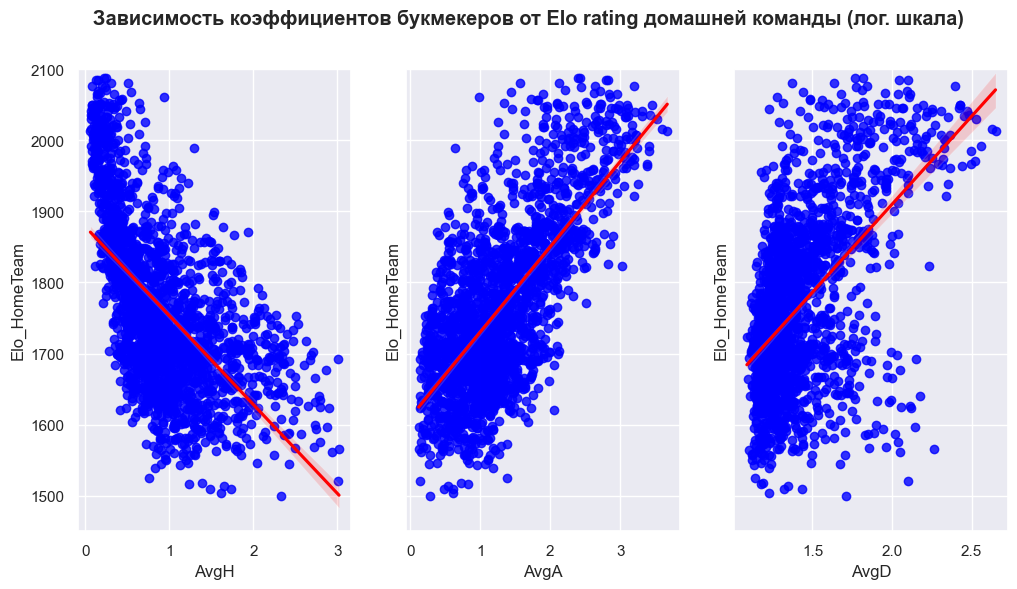

In [128]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

sns.regplot(x=df_log['AvgH'], y=df_books['Elo_HomeTeam'], ax=ax[0], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)

sns.regplot(x=df_log['AvgA'], y=df_books['Elo_HomeTeam'], ax=ax[1], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)

sns.regplot(x=df_log['AvgD'], y=df_books['Elo_HomeTeam'], ax=ax[2], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)
plt.ylim(1450, 2100)

plt.suptitle('Зависимость коэффициентов букмекеров от Elo rating домашней команды (лог. шкала)', weight='bold');

__Вывод:__ видно, что Elo rating гостевой команды влияет на AvgD. Чем больше рейтинг, тем меньше букмекеры верят в ничью. Связь с остальными коэффициентами довольно очевидна. Больше 

In [131]:
# fig, ax = plt.subplots(1, 3, figsize=(12, 6), dpi=140, sharey=True)

# sns.regplot(data=df_books, x='AvgH', y='Elo_AwayTeam', ax=ax[0], line_kws={'color': 'red'}, order=1)
# sns.regplot(data=df_books, x='AvgA', y='Elo_AwayTeam', ax=ax[1], line_kws={'color': 'red'}, order=1)
# sns.regplot(data=df_books, x='AvgD', y='Elo_AwayTeam', ax=ax[2], line_kws={'color': 'red'}, order=1)
# plt.ylim(1450, 2100)

# plt.suptitle('Зависимость коэффициентов букмекеров от Elo rating гостевой команды', weight='bold');

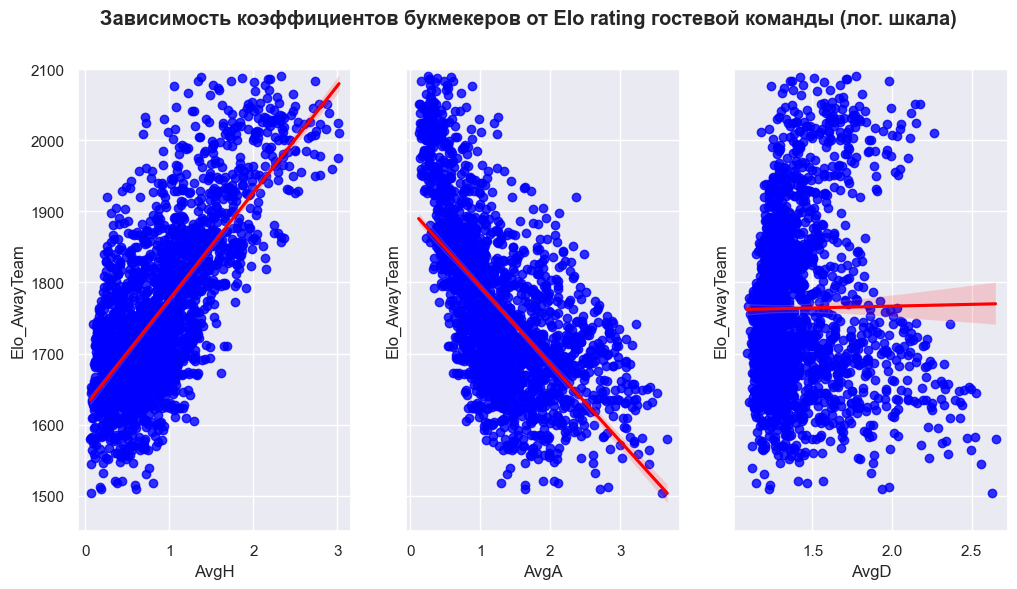

In [132]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

sns.regplot(x=df_log['AvgH'], y=df_books['Elo_AwayTeam'], ax=ax[0], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)

sns.regplot(x=df_log['AvgA'], y=df_books['Elo_AwayTeam'], ax=ax[1], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)

sns.regplot(x=df_log['AvgD'], y=df_books['Elo_AwayTeam'], ax=ax[2], 
            line_kws={'color': 'red'}, scatter_kws={'color': 'blue'}, order=1)
plt.ylim(1450, 2100)

plt.suptitle('Зависимость коэффициентов букмекеров от Elo rating гостевой команды (лог. шкала)', weight='bold');

А в случае гостевой команды влияния на коэффициент на ничью нет. Это интересный факт! Видимо, букмекеры учитывают фактор гостевой команды при оценке возможности ничьей

### Погода

In [145]:
df.columns

Index(['Date', 'Time', 'Location', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG',
       'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF',
       'AF', 'HC', 'AC', 'HY', 'AY', 'HR', 'AR', 'AvgH', 'AvgD', 'AvgA',
       'Elo_HomeTeam', 'Elo_AwayTeam', 'Temperature', 'Humidity', 'Wind Speed',
       'Condition'],
      dtype='object')

Попробуем исследовать данные о погоде. Для начала посмотрим как она меняется с течением времени

**Идеи столбцов, которые можно посмотреть:** 
- Даты(как меняется от месяца к месяцу)
- Локации
- Удары
- Нарушения (могут фолить из за плохой погоды)
- Результат
- Количества голов
- Команды (могут уметь играть лучше в плохих условиях